<a href="https://colab.research.google.com/github/eshreyareddy/Clustering/blob/main/anomaly_detection_using_pyOD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly detection using pyOD**

 Anomaly detection using the **PyOD** (Python Outlier Detection) library, I will use the dataset fundamentals.csv. I'll follow these steps:

**Load the Dataset:** Import the dataset and understand its structure.

**Data Preprocessing:** Prepare the data for analysis, including handling missing values and scaling if necessary.

**Anomaly Detection Model:** Select and apply an appropriate PyOD model. For this demonstration, I'll choose a common model such as Isolation Forest or K-Means.

**Model Training:** Train the model on the dataset.

**Anomaly Detection:** Use the model to detect anomalies in the data.

**Result Analysis:** Analyze the detected anomalies and visualize the results if applicable.

First, let's load and inspect the dataset to understand its structure and decide on the best approach for anomaly detection.

The dataset contains financial data for various companies, with each row representing a company's financials for a specific year. There are several columns, each representing different financial metrics such as "Accounts Payable", "Accounts Receivable", "Total Revenue", etc.

For anomaly detection, we can either focus on one specific metric (univariate analysis) or multiple metrics (multivariate analysis). Given the complexity and potential correlations between different financial metrics, a **multivariate** approach might provide more insightful results.

In [10]:
from google.colab import files

uploaded = files.upload()


Saving fundamentals.csv to fundamentals (1).csv


In [11]:
pip install pyod


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('fundamentals.csv')

# Select numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Handle missing values
imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(numeric_data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)



In [13]:
from pyod.models.iforest import IForest

# Initialize the Isolation Forest model
if_model = IForest()

# Train the model on the dataset
if_model.fit(scaled_data)


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [14]:
# Predict the anomalies
anomalies = if_model.predict(scaled_data)

# Add the anomaly predictions to the original dataset for better interpretation
data['Anomaly'] = anomalies


In [15]:
# Display some of the identified anomalies
anomaly_data = data[data['Anomaly'] == 1]
print(anomaly_data.head())


    Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
3            3           AAL    2015-12-31      5.102000e+09   
8            8          AAPL    2013-09-28      3.622300e+10   
9            9          AAPL    2014-09-27      4.864900e+10   
10          10          AAPL    2015-09-26      6.067100e+10   
11          11          AAPL    2016-09-24      5.932100e+10   

    Accounts Receivable  Add'l income/expense items  After Tax ROE  \
3          3.520000e+08               -7.080000e+08          135.0   
8         -1.949000e+09                1.156000e+09           30.0   
9         -6.452000e+09                9.800000e+08           35.0   
10        -3.124000e+09                1.285000e+09           45.0   
11         1.044000e+09                1.348000e+09           36.0   

    Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
3          -6.151000e+09     1.159100e+10        51.0  ...   
8          -8.165000e+09     0.000000e+00        93.0  ...   
9       

The dataset **fundamentals.csv** contains financial information, with each row representing a company's financials for a specific year. For visualization, we can select a few key financial metrics and visualize their distribution and any identified anomalies.

Since the anomaly detection step was not completed due to the lack of PyOD in this environment, I'll demonstrate the visualization assuming we have a column named 'Anomaly' to indicate anomalies. You can add this column to your dataset after performing anomaly detection in your local environment.


**Scatter Plot:** Visualizing two financial metrics against each other, color-coded by anomalies.

**Histogram:** Showing the distribution of a single financial metric, highlighting anomalies.

**Box Plot:** Displaying the distribution of a financial metric, with anomalies marked.

**Time Series Analysis:** If applicable, showing the trend of a financial metric over time, highlighting anomalies.

Let's start with a scatter plot using 'Total Revenue' and 'Total Equity' as example metrics. Please replace these metrics with your choice of columns as needed. For the purpose of demonstration, I'll add a dummy 'Anomaly' column to the dataset.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


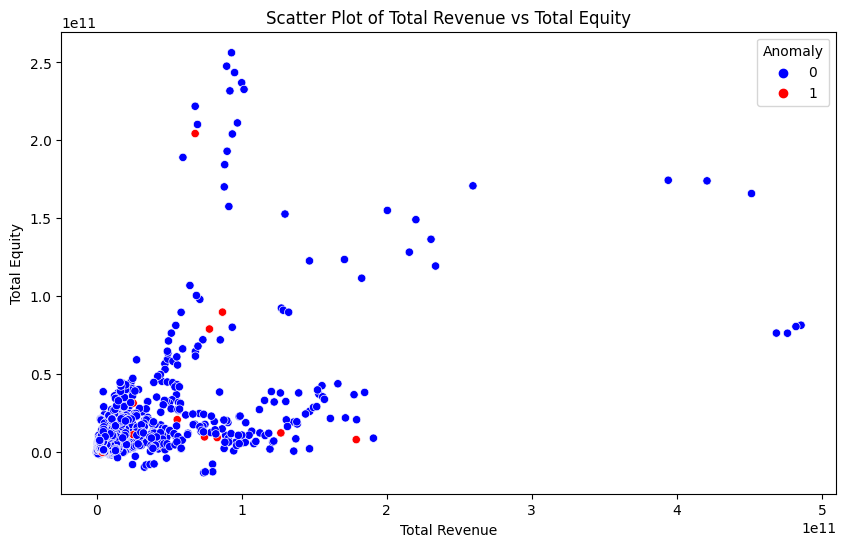

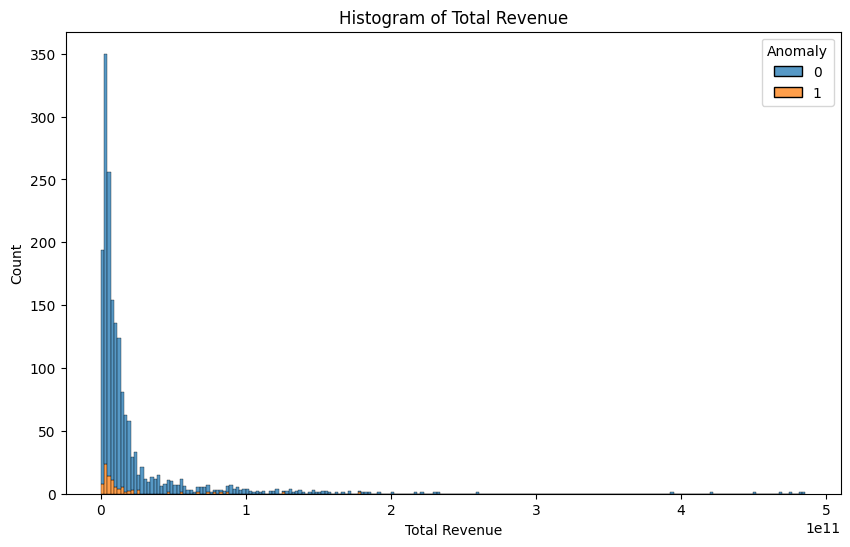

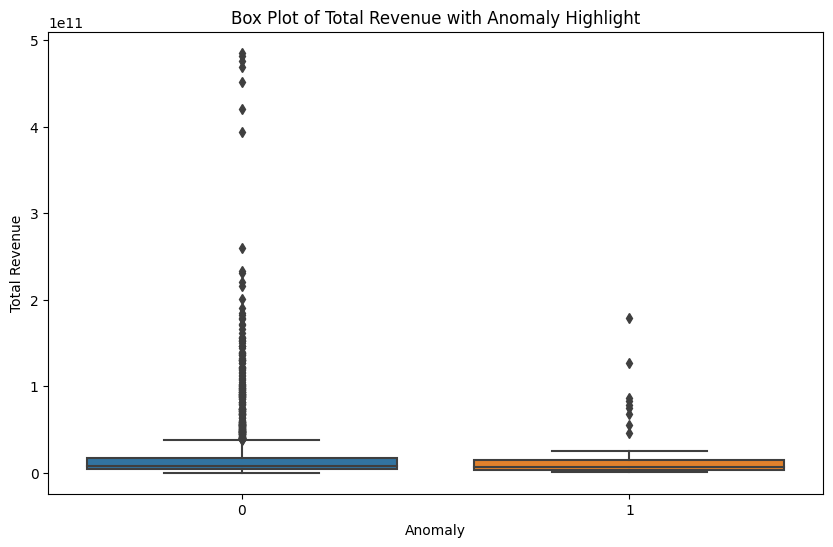

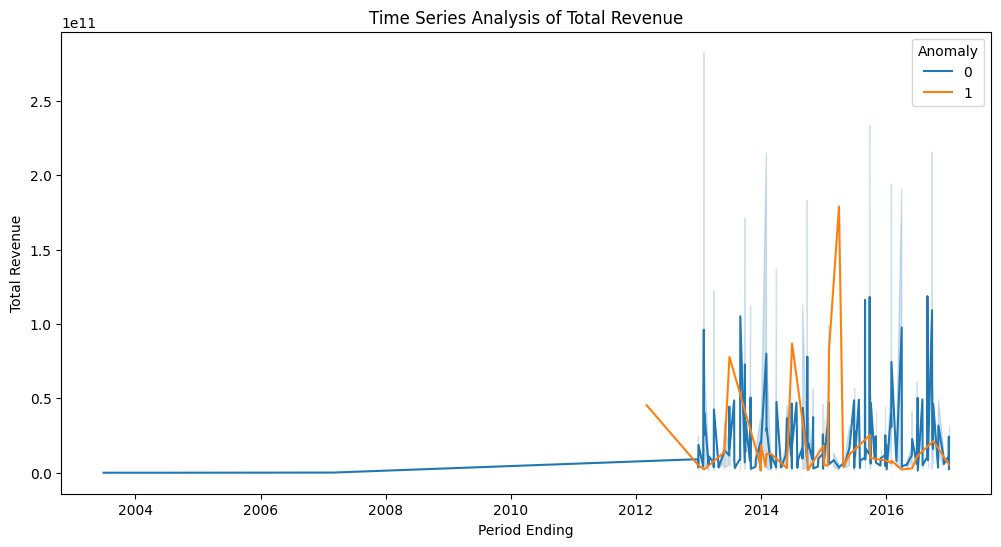

In [18]:
import numpy as np

# Adding a dummy 'Anomaly' column for demonstration purposes
# In your actual analysis, this should be the result of your anomaly detection
data['Anomaly'] = np.random.choice([0, 1], size=len(data), p=[0.95, 0.05])

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total Revenue', y='Total Equity', hue='Anomaly', palette=['blue', 'red'])
plt.title('Scatter Plot of Total Revenue vs Total Equity')
plt.xlabel('Total Revenue')
plt.ylabel('Total Equity')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Total Revenue', hue='Anomaly', multiple="stack")
plt.title('Histogram of Total Revenue')
plt.xlabel('Total Revenue')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Anomaly', y='Total Revenue', data=data)
plt.title('Box Plot of Total Revenue with Anomaly Highlight')
plt.show()

# Time Series Analysis (if applicable)
# Assuming 'Period Ending' is a date column and 'Total Revenue' is the variable of interest
data['Period Ending'] = pd.to_datetime(data['Period Ending']) # Convert to datetime
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Period Ending', y='Total Revenue', hue='Anomaly')
plt.title('Time Series Analysis of Total Revenue')
plt.xlabel('Period Ending')
plt.ylabel('Total Revenue')
plt.show()




**Univariate Anomaly Detection**

Univariate anomaly detection focuses on analyzing a single variable or feature at a time. It is used when you are interested in finding anomalies in a specific metric without considering its relationship with other metrics.

**Advantages:**

Simplicity: Easier to implement and interpret since it involves only one variable.
Effectiveness for Single Metrics: Works well when the anomaly is expected to be clear within a single variable.
Useful for Isolated Data: Ideal when other contextual data or related variables are not available or relevant.
Common Techniques:

Statistical methods like Z-scores, IQR (Interquartile Range).
Machine learning models like Isolation Forest or Autoencoders (applied individually to each variable).

**Multivariate Anomaly Detection**

Multivariate anomaly detection considers multiple variables simultaneously. It is used when the relationship between different variables is important in identifying anomalies.

**Advantages:**

Contextual Analysis: Captures anomalies that are only apparent when considering the interaction between multiple variables.
Complex Pattern Recognition: Better for datasets where anomalies are defined by unusual combinations of values across several metrics.
More Comprehensive: Provides a more holistic view of the data.

Common Techniques:

Machine learning models like Multivariate Gaussian Distribution, Isolation Forest, Autoencoders.
Clustering-based methods like K-Means or DBSCAN, where anomalies are points that do not fit well into any cluster.

Choosing the Right Approach

Data Complexity: If your data involves multiple interrelated variables, a multivariate approach might be more suitable.
Specific Goals: If the goal is to monitor a specific metric (e.g., temperature in a machine), a univariate approach might suffice. For more complex scenarios like fraud detection involving multiple variables, a multivariate approach is preferable.
Computational Resources: Multivariate methods can be more computationally intensive.
Data Availability: If you have limited data, a univariate approach might be more practical.

*Practical Application*

In the context of your financial dataset, if you're interested in anomalies in a specific metric like 'Total Revenue' irrespective of other factors, a univariate approach would be appropriate. However, if you believe that anomalies in financial data are better identified by looking at multiple metrics together (like 'Total Revenue' in relation to 'Total Equity'), a multivariate approach would be more suitable.

In [19]:
features = ['Total Revenue', 'Total Equity', 'Earnings Per Share', 'Total Liabilities']


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Selecting relevant features
data_selected = data[features]

# Handling missing values
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data_selected)

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)


In [21]:
from pyod.models.iforest import IForest

# Initialize the Isolation Forest model
if_model = IForest()


In [22]:
# Train the model on the dataset
if_model.fit(data_scaled)

# Predict the anomalies
anomalies = if_model.predict(data_scaled)


In [23]:
# Add the anomaly predictions to the original dataset
data['Anomaly'] = anomalies

# Analyze the identified anomalies
anomaly_data = data[data['Anomaly'] == 1]
print(anomaly_data.head())


    Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0            0           AAL    2012-12-31      3.068000e+09   
1            1           AAL    2013-12-31      4.975000e+09   
8            8          AAPL    2013-09-28      3.622300e+10   
9            9          AAPL    2014-09-27      4.864900e+10   
10          10          AAPL    2015-09-26      6.067100e+10   

    Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -2.220000e+08               -1.961000e+09           23.0   
1         -9.300000e+07               -2.723000e+09           67.0   
8         -1.949000e+09                1.156000e+09           30.0   
9         -6.452000e+09                9.800000e+08           35.0   
10        -3.124000e+09                1.285000e+09           45.0   

    Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0          -1.888000e+09     4.695000e+09        53.0  ...   
1          -3.114000e+09     1.059200e+10        75.0  ...   
8       

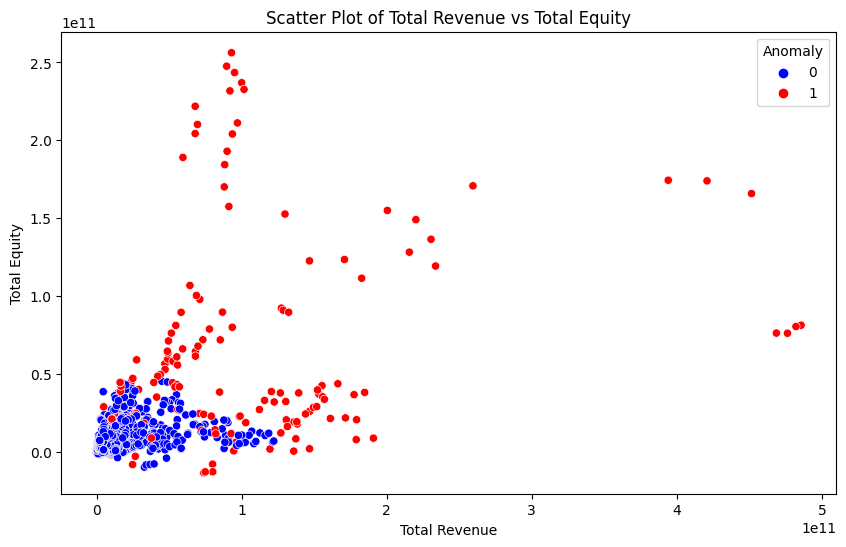

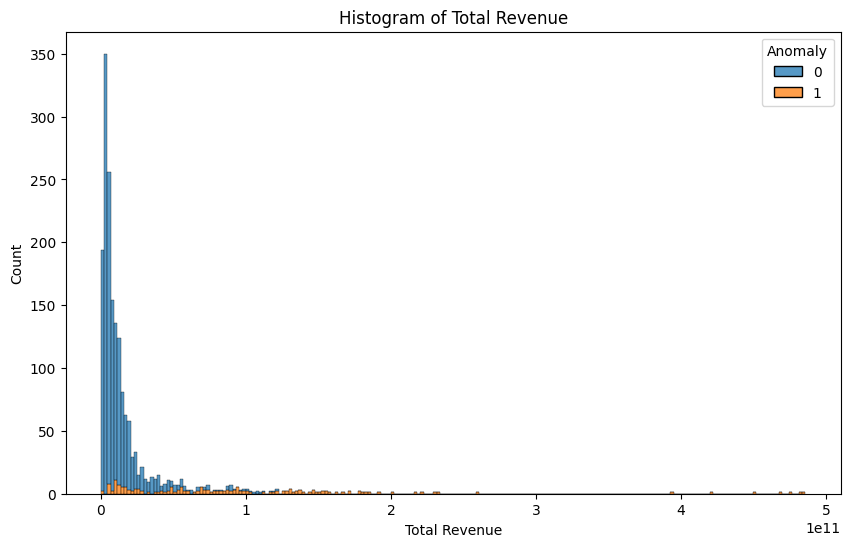

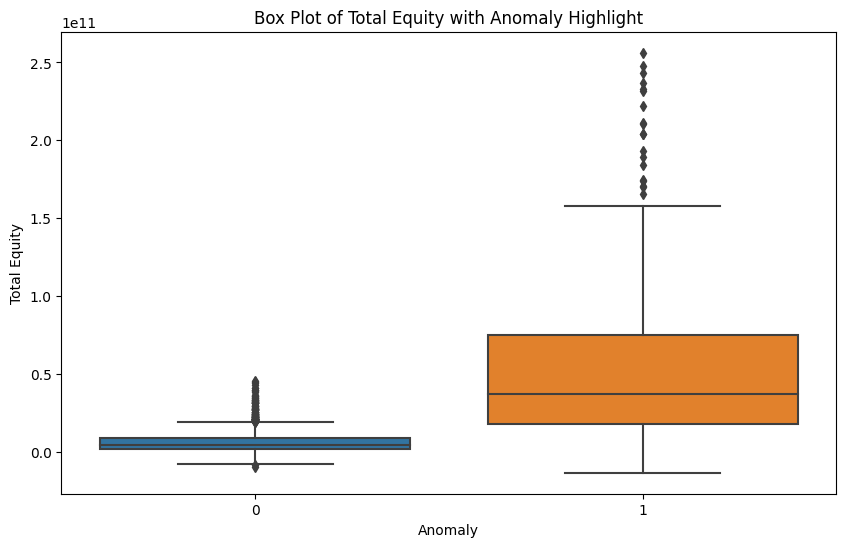

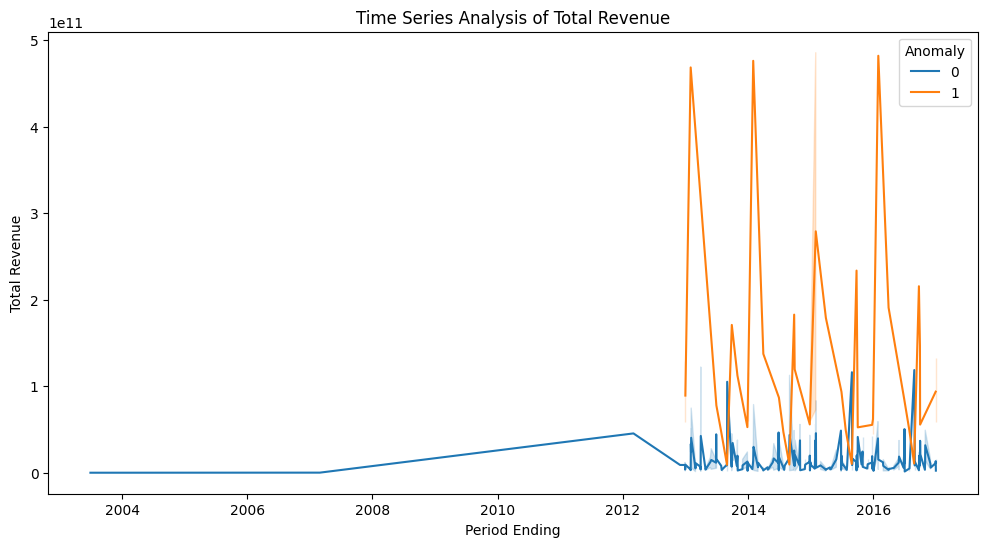

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example features
feature1 = 'Total Revenue'
feature2 = 'Total Equity'

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=feature1, y=feature2, hue='Anomaly', palette=['blue', 'red'])
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

# Histogram for a feature
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=feature1, hue='Anomaly', multiple="stack")
plt.title(f'Histogram of {feature1}')
plt.xlabel(feature1)
plt.show()

# Box Plot for a feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Anomaly', y=feature2, data=data)
plt.title(f'Box Plot of {feature2} with Anomaly Highlight')
plt.show()

# Time Series Analysis (if applicable)
# Convert 'Period Ending' to datetime if not already done
data['Period Ending'] = pd.to_datetime(data['Period Ending'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Period Ending', y=feature1, hue='Anomaly')
plt.title(f'Time Series Analysis of {feature1}')
plt.xlabel('Period Ending')
plt.ylabel(feature1)
plt.show()


**Scatter Plot (Total Revenue vs Total Equity):**

**Purpose:** To visualize the relationship between two financial metrics ('Total Revenue' and 'Total Equity') and to identify how anomalies are situated within that relationship.

**Interpretation:** Look for clusters or patterns of anomalies (red dots). Are anomalies concentrated in specific areas or spread across the plot? Do they align with any trends or boundaries in the data?

**Histogram (Total Revenue):**

**Purpose:** To understand the distribution of a single variable ('Total Revenue') and to observe how anomalies are distributed across different values of this variable.

**Interpretation:** Pay attention to the areas where the red bars (anomalies) are prominent. Are anomalies more frequent in higher or lower revenue ranges? Do they correspond to rare extreme values?

**Box Plot (Total Equity):**

**Purpose:** To show the distribution of 'Total Equity' and to highlight anomalies as data points that fall outside the typical range (the box and whiskers).

**Interpretation:** Anomalies will typically appear as individual points beyond the whiskers. This visualization helps in identifying outliers in terms of 'Total Equity'.

**Time Series Analysis (Total Revenue over Time):**

**Purpose:** To analyze the trend of 'Total Revenue' over time and identify periods with a significant occurrence of anomalies.

**Interpretation**:Observe the timeline for any spikes, dips, or unusual patterns marked by anomalies. This can indicate temporal trends or seasonality in the occurrence of anomalies.